# **GNR 638 Project**

The following file consists of our code for training and testing YOLO on a custom dataset of Kangaroos. The dataset can be found at https://drive.google.com/drive/folders/1A5CaI-oRcHNPkUG6zYG_My0_IdepS4hI?usp=sharing.

There are 160+ images in the images folder, and their corresponding annotations in the annots folder.

**Importing essential libraries**

First we import Drive in the Colab file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

To be able to run the code correctly, kindly change the below directory to the project folder copied to your drive.

In [ ]:
cd drive/MyDrive/Second\ Year/GNR638/Project

/content/drive/MyDrive/Second Year/GNR638/Project


Installing tensorflow (version <2).

In [ ]:
!pip install tensorflow-gpu==1.15.0rc2

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.0rc2 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.6.0, 2.6.1, 2.6.2, 2.7.0rc0, 2.7.0rc1, 2.7.0)
ERROR: No matching distribution found for tensorflow-gpu==1.15.0rc2


Setting up darkflow to train the YOLO model.

In [ ]:
!python setup.py build_ext --inplace

setup.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
running build_ext
copying build/lib.linux-x86_64-3.7/darkflow/cython_utils/nms.cpython-37m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.7/darkflow/cython_utils/cy_yolo2_findboxes.cpython-37m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.7/darkflow/cython_utils/cy_yolo_findboxes.cpython-37m-x86_64-linux-gnu.so -> darkflow/cython_utils


Importing libraries used, such as matplotlib, opencv and numpy.

In [ ]:
%tensorflow_version 1.15.0rc2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.0rc2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











**Making the model**

We have made a new config file, called *yolo-changes.cfg*, which consists of the model parameters. Since we are training on a smaller dataset with 1 class, so the corresponding changes have been made to the *yolo-changes.cfg* file.

In [ ]:
model = {"model": "cfg/yolo-changes.cfg", 
           "load": "bin/yolov2.weights",
           "batch": 4,
           "epoch": 50,
           "gpu": 1,
           "trainer": "adam",
           "train": True,
           "annotation": "./annots/",
           "dataset": "./images/"}

**Compiling the model**

We make tfnet with *yolo-changes.cfg* as our config file, and *yolo2.weights* as the pre-trained weight file. We have modified the YOLO model to use the Adam optimizer (the original YOLO paper uses SGD optimizer). The model is trained on the custom dataset for 50 epochs (~2000 steps).

In [ ]:
tfnet = TFNet(model)

/content/drive/My Drive/Second Year/GNR638/Project/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo-changes.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo-changes.cfg
Loading bin/yolov2.weights ...
Finished in 0.09083151817321777s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky  

**Training the model**

In [ ]:
tfnet.train()


cfg/yolo-changes.cfg parsing ./annots/
Parsing for ['kangaroo'] 
[====================>]100%  00043.xml
Statistics:
kangaroo: 266
Dataset size: 164
Dataset of 164 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 4
	Epoch number  : 50
	Backup every  : 2000
step 1 - loss 85.6783447265625 - moving ave loss 85.6783447265625
step 2 - loss 83.21782684326172 - moving ave loss 85.43229293823242
step 3 - loss 84.97528839111328 - moving ave loss 85.3865924835205
step 4 - loss 78.31973266601562 - moving ave loss 84.67990650177002
step 5 - loss 73.36878967285156 - moving ave loss 83.54879481887818
step 6 - loss 74.36045837402344 - moving ave loss 82.6299611743927
step 7 - loss 71.51438903808594 - moving ave loss 81.51840396076203
step 8 - loss 76.62799072265625 - moving ave loss 81.02936263695146
step 9 - loss 73.8273696899414 - moving ave loss 80.30916334225046
step 10 - loss 70.39127349853516 - moving ave loss 79.31737435787893
step 11 - loss 70.3987045288086 - moving a

**Testing the model**

We first test the model on one of the images from our dataset.

In [ ]:
image = cv2.imread("images/00001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(image)
print(results)

[{'label': 'kangaroo', 'confidence': 0.14254387, 'topleft': {'x': 221, 'y': 109}, 'bottomright': {'x': 491, 'y': 296}}, {'label': 'kangaroo', 'confidence': 0.0, 'topleft': {'x': 34, 'y': 146}, 'bottomright': {'x': 225, 'y': 343}}, {'label': 'kangaroo', 'confidence': 0.5677229, 'topleft': {'x': 48, 'y': 123}, 'bottomright': {'x': 242, 'y': 358}}]


**Original image**

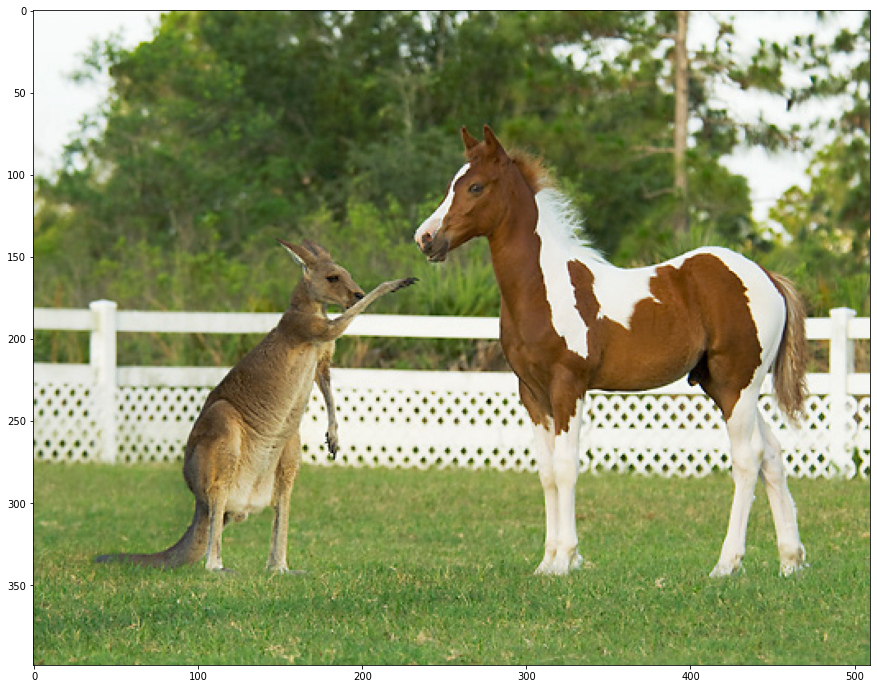

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(image)

**Function to show bounding box on images**

Only those boxes are taken into consideration which show confidence > 0.5, so as to get the best possible results.

In [ ]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.5:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

**Predicted image**

Note that our model is able to comfortably distinguish between the kangaroo and the horse.

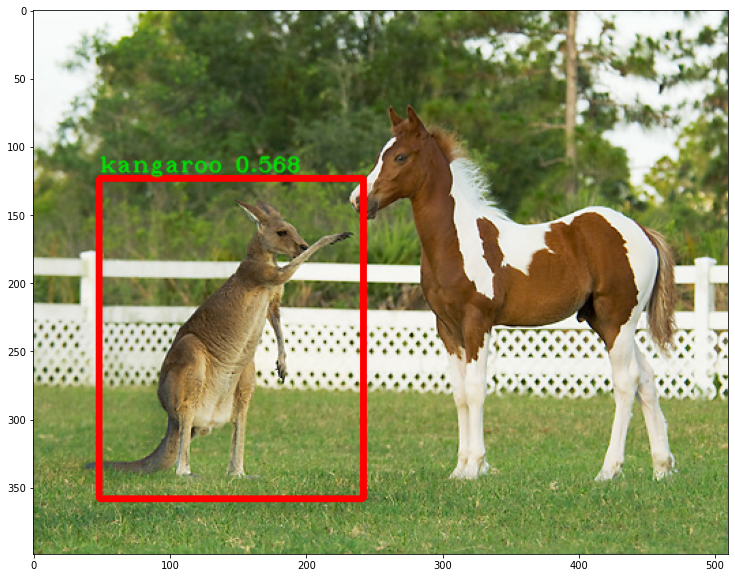

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(image, results))

Showing results for the first 6 images in the dataset.

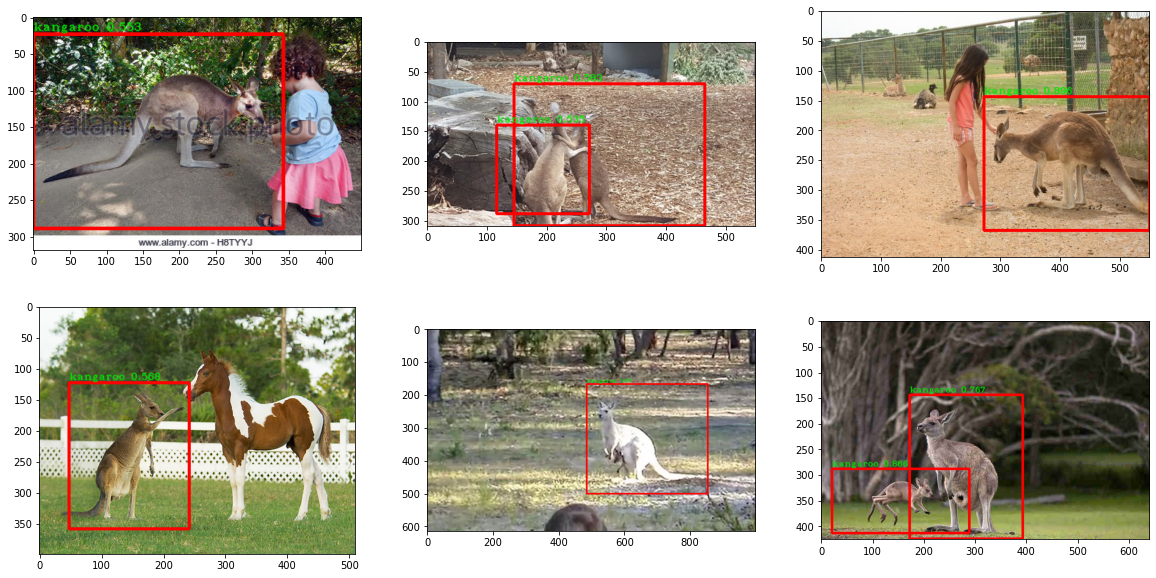

In [ ]:
from math import ceil

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i in range(6):
    image = cv2.imread("images/0000" + str(i+1) + ".jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = tfnet.return_predict(image)
    
    ax[ceil(i/3)-1, i%3].imshow(boxing(image, results))